**Réalisé par :**
# BARKA AYOUB 
# LEHCENE MOHAMMED LAMINE


Importation des bibliothèques nécessaires 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Pretraitement et analyse des données

In [ ]:
#Chargez des données 
data = pd.read_csv('mobile_prices_train.csv')


In [ ]:
# Affichez les premières lignes du dataframe
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#The shape of the training dataset
data.shape


(2000, 21)

In [ ]:
# Looking at the random datapoints from the dataset
data.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
206,1642,0,0.5,1,16,1,8,0.3,171,6,...,129,873,2984,13,4,17,1,0,1,2
1160,1159,0,2.7,0,13,1,28,0.2,80,8,...,378,751,2495,10,0,9,1,1,1,2
408,1504,0,1.5,0,12,1,34,0.7,142,8,...,507,973,2806,7,2,7,1,0,1,2
1400,1325,1,0.5,0,0,1,13,1.0,133,4,...,1353,1915,3707,19,3,18,1,1,0,3
459,513,1,0.5,0,6,1,44,0.1,186,4,...,619,867,1343,5,1,9,1,1,0,0


In [ ]:
# Vérifiez les informations sur les colonnes et les types de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Obtenez des statistiques descriptives sur les données numériques
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Vérifier et traiter les valeurs manquantes
data.isnull().sum()
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: >

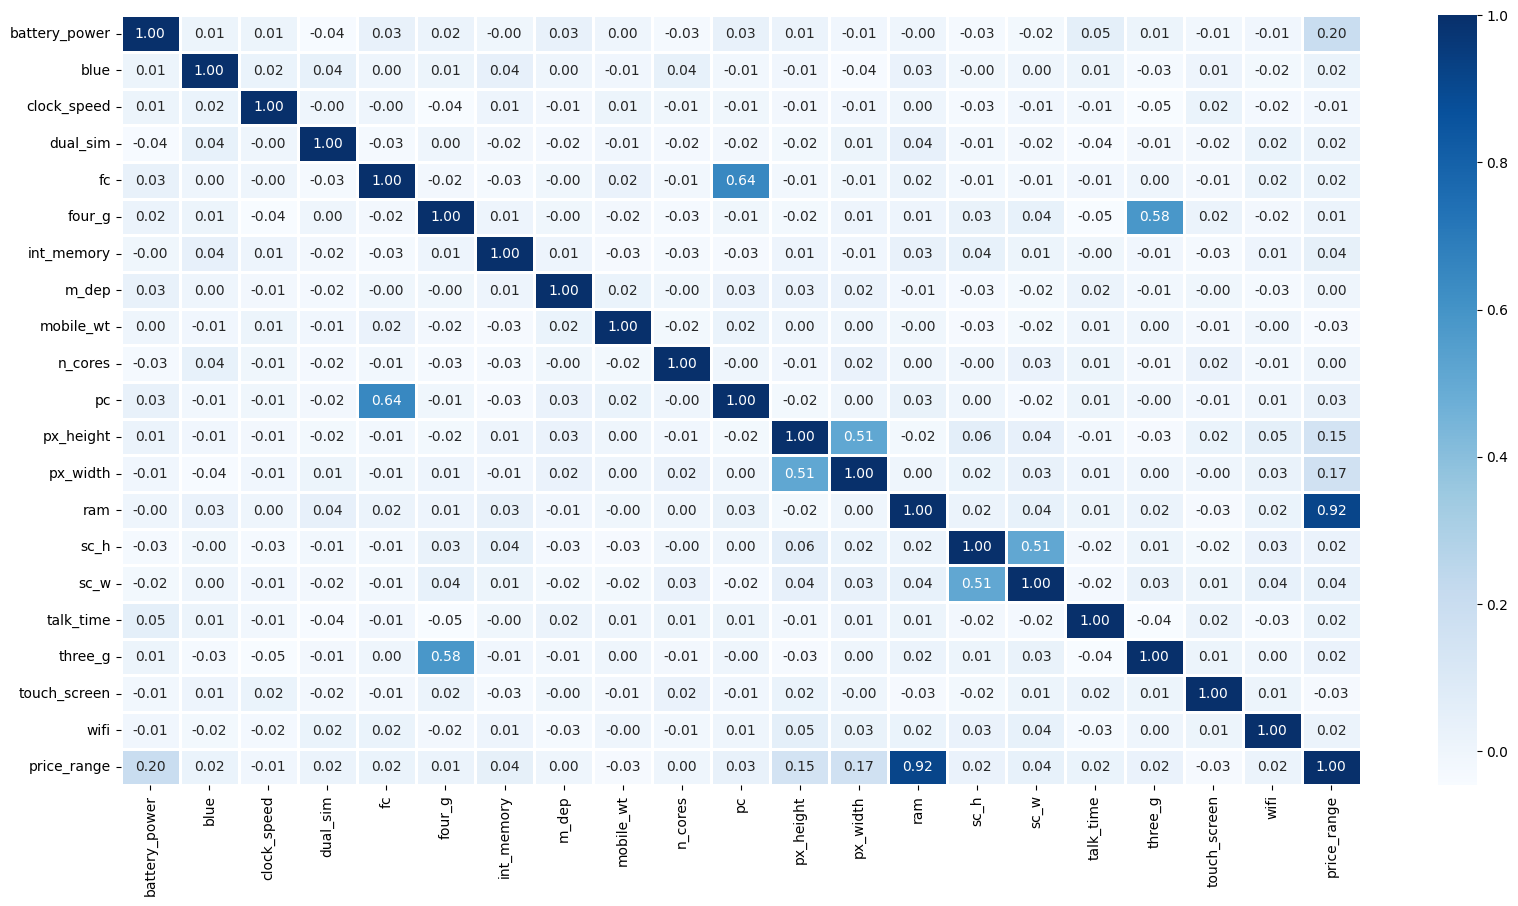

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True,cmap = 'Blues', fmt=".2f", linecolor='white', linewidths=1)

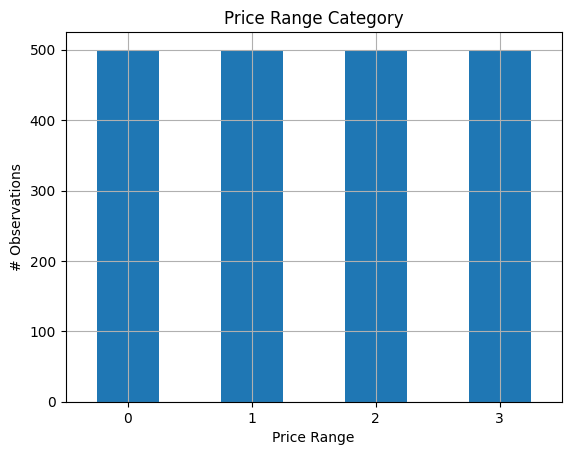

In [ ]:
data['price_range'].sort_values().value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Price Range Category')
plt.xlabel('Price Range')
plt.ylabel('# Observations')
plt.grid()
plt.show()

Entraînez notre modèle 

In [ ]:

# Divisez les données en caractéristiques (X) et variable cible (y)
X = data.drop("price_range", axis=1)
y = data["price_range"]

# Convertissez la variable cible en une variable binaire (0 ou 1)
y = np.where(y == "low", 0, 1)

# Divisez les données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape,X_test.shape)

(1600, 20) (400, 20)


Appliquer feature scaling (normalisation) aux colonnes numériques de l'ensemble de données. Cela nous aidera dans le cas d'algorithmes basés sur la distance tels que la régression logistique.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Appliquer la mise à l'échelle des caractéristiques aux colonnes numériques de X_train
numerical_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
                     'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Appliquer la même mise à l'échelle des caractéristiques aux colonnes numériques de X_test
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


 Définition de la fonction sigmoïde

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Définition de la fonction de coût (entropie croisée binaire)

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    #epsilon = 1e-5  # Petite valeur ajoutée pour éviter les erreurs de division par zéro
   #cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

Algorithme de descente de gradient pour l'optimisation

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        # Affichage du coût toutes les 100 itérations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i + 1}/{num_iters} - Cost: {cost}")
    
    return theta, costs


In [ ]:
def predict(X, theta):
    h = sigmoid(np.dot(X, theta))
    predictions = np.where(h >= 0.5, 1, 0)
    return predictions



In [ ]:
# Ajoutez une colonne de biais aux ensembles d'entraînement et de test
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Initialisez les paramètres theta à zéro
theta = np.zeros(X_train.shape[1])



In [ ]:
# Définissez les hyperparamètres
alpha = 0.01
num_iters = 1000

In [ ]:
# Entraînez le modèle de régression logistique
theta, costs = gradient_descent(X_train, y_train, theta, alpha, num_iters)

Iteration 100/1000 - Cost: 0.31278837863933623
Iteration 200/1000 - Cost: 0.19467255099150976
Iteration 300/1000 - Cost: 0.141034219764468
Iteration 400/1000 - Cost: 0.11081354298827169
Iteration 500/1000 - Cost: 0.09147904118503082
Iteration 600/1000 - Cost: 0.07804875992011623
Iteration 700/1000 - Cost: 0.06817054924594687
Iteration 800/1000 - Cost: 0.06059374794672474
Iteration 900/1000 - Cost: 0.054593145061541455
Iteration 1000/1000 - Cost: 0.049719554618199754


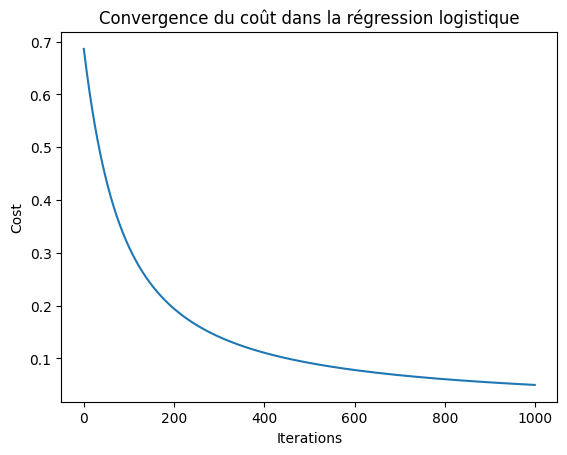

In [ ]:
# Affichage de la courbe de convergence du coût
plt.plot(range(num_iters), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence du coût dans la régression logistique")
plt.show()

In [ ]:
# Prédisez les étiquettes pour les ensembles d'entraînement et de test
train_predictions = predict(X_train, theta)
test_predictions = predict(X_test, theta)


In [ ]:
# Calculez l'exactitude du modèle

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Exactitude (Ensemble d'entraînement) :", train_accuracy*100 ," %")
print("Exactitude (Ensemble de test) :", test_accuracy*100 , " %")

Exactitude (Ensemble d'entraînement) : 100.0  %
Exactitude (Ensemble de test) : 100.0  %


In [ ]:
(unique, counts) = np.unique(train_predictions, return_counts=True)
price_range = np.asarray((unique, counts)).T
print(price_range)

[[   1 1600]]
